# Lab03

## Neural Network 
We are going to implmenet a Neural Network for identifying animal species using features of animals.

In [0]:
import tensorflow as tf
import numpy as np

Let's say we have two features that represnet each: 
1. Does animal has hair? 
2. Does animal has feather?

We would like to predict whether the animal is bird, mammal, or other. 


In [0]:
# [Hair, Feather]
x_data = np.array(
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]])

# [Other, Mammal, Bird]
y_data = np.array([
    [1, 0, 0],  # Other
    [0, 1, 0],  # Mammal
    [0, 0, 1],  # Bird
    [1, 0, 0],  # Other
    [1, 0, 0],  # Mammal
    [0, 0, 1]   # Bird
])

# number of input (features), 2 - Hair, Feather
num_input = 2
# number of output (classes), 3 - Other, Mammal, Bird
num_classes = 3


**But, why One-hot encoding?**
There is no ordinal relationship exists!

### No hidden layer

In [3]:
### Neural Network Model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

weights = {
    # [Input(Features), Output(Classes)] -> [2, 3]
    'out': tf.Variable(tf.random_normal([num_input, num_classes]))
}
biases = {
    # Let Bias the number of output candidates, which is 3 (number of classes).
    'out': tf.Variable(tf.random_normal([num_classes]))
}

learning_rate=0.01

def neural_network(X):
  # Apply Weight and Bias
  output_layer = tf.add(tf.matmul(X, weights['out']), biases['out'])
    
  return output_layer
    
logits = neural_network(X)

# Calculate cost (error) for the model
cost_op = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))


# Apply GradientDescent optimiser
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost_op)

### Evaluation
# Apply softmax() to have normalised output
# softmax() changes each value to have between 0 and 1, and all values will add up to 1
# softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
prediction = tf.nn.softmax(logits)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Train Model
init = tf.global_variables_initializer()
with tf.Session() as sess:
  
  sess.run(init)
  
  no_of_epochs = 2000
  display_interval = 200

  # Every epoch, the model will be modified by the given learning rate
  for epoch in range(no_of_epochs):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})    
    # every display_interval loop, the training information will be displayed
    if epoch % display_interval == 0 :
      # calculate the cost/accuracy of the current model
      cost, acc = sess.run([cost_op, accuracy], feed_dict={X: x_data,
                                                             Y: y_data})
      print("Epoch " + str(epoch) + ", Cost= " + 
              "{:.4f}".format(cost) + ", Training Accuracy= " + 
              "{:.3f}".format(acc))


### Result
  prediction = tf.argmax(prediction, 1)
  answer = tf.argmax(Y, 1)
  print('Predicted :', sess.run(prediction, feed_dict={X: x_data}))
  print('Answer :', sess.run(answer, feed_dict={Y: y_data}))

  is_correct = tf.equal(prediction, answer)
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  print('Accuracy : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 0, Cost= 0.9494, Training Accuracy= 0.500
Epoch 200, Cost= 0.8623, Training Accuracy= 0.500
Epoch 400, Cost= 0.7915, Training Accuracy= 0.500
Epoch 600, Cost= 0.7341, Training Accuracy= 0.500
Epoch 800, Cost= 0.6871, Training Accuracy= 0.500
Epoch 1000, Cost= 0.6481, Training Accuracy= 0.667
Epoch 1200, Cost= 0.6150, Training Accuracy= 0.667
Epoch 1400, Cost= 0.5864, Training Accuracy= 0.667
Epoch 1600, Cost= 0.5613, Training Accuracy= 0.667
Epoch 1800, Cost= 0.5389, Training Accuracy= 0.667
Predicted : [0 0 2 0 0 2]
Answer : [0 1 2 0 0 2]
Accuracy : 83.33


### With Hidden Layer

In [1]:
### Neural Network Model

# number of neurons in hidden layer, 
n_hidden_1 = 5

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)


weights = {
    # [Input(Features), Output(number of neurons in hidden layer)] -> [2, 5]
    'w1': tf.Variable(tf.random_uniform([num_input, n_hidden_1], -1., 1.)),
    # [Input(number of neurons in hidden layer), Output(Classes)] -> [5, 3]
    'out': tf.Variable(tf.random_uniform([n_hidden_1, num_classes], -1., 1.))
}
biases = {
    # Let Hidden Layer Bias the number of output candidates, which is 3 (number of neurons in hidden layer).
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # Let Bias the number of output candidates, which is 3 (number of classes).
    'out': tf.Variable(tf.random_normal([num_classes]))
}

learning_rate=0.01

def neural_network(X):
  # Apply Weight and Bias to each neuron 
  hidden_layer = tf.add(tf.matmul(X, weights['w1']), biases['b1'])

  # Apply ReLU (Activation Function)
  output_layer = tf.matmul( tf.nn.relu(hidden_layer), weights['out']) + biases['out']  
    
  return output_layer
    
logits = neural_network(X)

# Calculate cost (error) for the model
cost_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))


# Apply GradientDescent optimiser
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(cost_op)


### Evaluation
# Apply softmax() to have normalised output
# softmax() changes each value to have between 0 and 1, and all values will add up to 1
# i.e.) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]
# softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
prediction = tf.nn.softmax(logits)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


### Train Model
init = tf.global_variables_initializer()
with tf.Session() as sess:
  
  sess.run(init)
  
  no_of_epochs = 2000
  display_interval = 200
  
  # Every epoch, the model will be modified by the given learning rate
  for epoch in range(no_of_epochs):
    sess.run(train_op, feed_dict={X:x_data, Y:y_data})    
    # every display_interval loop, the training information will be displayed
    if epoch % display_interval == 0 :
      # calculate the cost/accuracy of the current model
      cost, acc = sess.run([cost_op, accuracy], feed_dict={X: x_data,
                                                             Y: y_data})
      print("Epoch " + str(epoch) + ", Cost= " + 
              "{:.4f}".format(cost) + ", Training Accuracy= " + 
              "{:.3f}".format(acc))


### Result 
  prediction = tf.argmax(prediction, 1)
  answer = tf.argmax(Y, 1)
  print('Predicted :', sess.run(prediction, feed_dict={X: x_data}))
  print('Answer :', sess.run(answer, feed_dict={Y: y_data}))

  is_correct = tf.equal(prediction, answer)
  accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
  print('Accuracy : %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))


NameError: ignored

### Word2Vec on TensorFlow
Let's try to implement Word2Vec with Neural Network with TensorFlow

In [0]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# raw data - setences 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))

# make dictionary so that we can be reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}

# Making window size 1 skip-gram
# i.e.) he likes cat
#   -> (he, [likes]), (likes,[he, cat]), (cat,[likes])
#   -> (he, likes), (likes, he), (likes, cat), (cat, likes)
skip_grams = []

for i in range(1, len(word_sequence) - 1):
    # (context, target) : ([target index - 1, target index + 1], target)
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    # skipgrams - (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])

        

In [0]:

### Create Model Graph

# prepare random batch from skip-gram - we do not have enought data so we randomly select data
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels


learning_rate = 0.1
batch_size = 10
embedding_size = 2

# sampling size for nce_loss function (cost function)
# must be lower than batch_size
sample_size = 5

voc_size = len(word_list)


inputs = tf.placeholder(tf.int32, shape=[batch_size])
# placeholder (output) of function tf.nn.nce_loss()
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# word2vec Model
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
# i.e.)  embeddings       inputs       selected
#       [[1, 2, 3]   ->   [2, 3]   -> [[2, 3, 4]
#        [2, 3, 4]                    [3, 4, 5]]
#        [3, 4, 5]
#        [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

# weight and bias for nce_loss() function
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

cost_op = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, sample_size, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)



** [tf.nn.embedding_lookup()](https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup)** lets you find ids in a list of embedding tensors

In [5]:
### Training Model
import os
#save a model every 2 hours and maximum 3 latest models are saved
saver=tf.train.Saver(max_to_keep=3)
#path to save the model
file_path='./cornell'
path=os.path.dirname(os.path.abspath(file_path))


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    no_of_epochs = 500
    display_interval = 50

    for epoch in range(no_of_epochs):
        batch_inputs, batch_labels = prepare_batch(skip_grams, batch_size)
        sess.run(train_op, feed_dict={inputs:batch_inputs, labels:batch_labels})    

        if epoch % display_interval == 0 :
            # calculate the cost/accuracy of the current model
            cost = sess.run(cost_op, feed_dict={inputs:batch_inputs,
                                                  labels:batch_labels})
            print("Epoch " + str(epoch) + ", Cost= " + 
                    "{:.4f}".format(cost))
            
    # assign the learned embeddings for display on matplot
    # within 'with'  you can use eval() instead of sess.run()
    trained_embeddings = embeddings.eval()

Epoch 0, Cost= 6.9206
Epoch 50, Cost= 2.0454
Epoch 100, Cost= 2.6626
Epoch 150, Cost= 3.1134
Epoch 200, Cost= 1.6703
Epoch 250, Cost= 2.9014
Epoch 300, Cost= 1.7694
Epoch 350, Cost= 2.2950
Epoch 400, Cost= 2.2878
Epoch 450, Cost= 2.4332


game  :  -0.4743865   -0.09687054
he  :  -0.7270525   -1.1040478
dog  :  -1.0392455   0.9875903
she  :  -1.2265873   0.7385297
dislikes  :  -0.70996535   -1.3022401
fish  :  -1.7451428   0.80001783
movie  :  -1.4954689   -1.0766411
animal  :  -1.6568509   -0.9046266
music  :  -0.049988993   0.09387256
cat  :  -1.2635938   0.42683133
bone  :  -2.8585083   -0.31376436
milk  :  -2.1818671   -0.9165146
likes  :  -0.25543714   -0.25553495


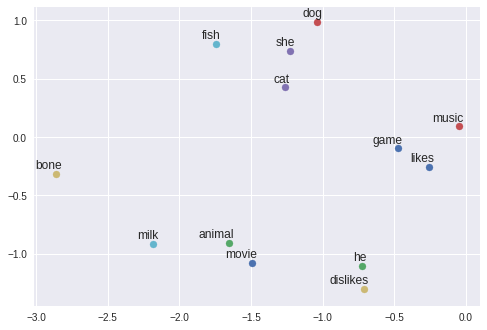

In [6]:
### Visualise result
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    print (label, " : ", x, " " , y)
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()


# Scikit-learn (sklearn) & pandas package

[sklearn](https://scikit-learn.org/stable/modules/classes.html) and [pandas](http://pandas.pydata.org/pandas-docs/stable/reference/index.html) are powerful tools for data mining and data analysis.

First, download tagged movie plots data.


In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1x1BE_N8kCKDT9zo60DQPIjURy_-c5ULW'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('tagged_plots_movielens.csv')  

## pandas
You can use pandas to read csv file and show data distribution.

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('tagged_plots_movielens.csv')
#remove mnissing values
df = df.dropna()

['animation' 'fantasy' 'comedy' 'action' 'romance' 'sci-fi']


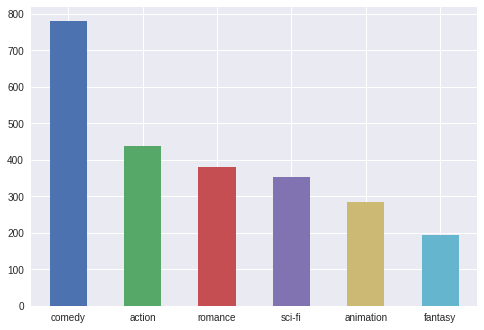

In [28]:
my_tags = df.tag.unique()
print(my_tags)

# plot "tag" of dataframe (df) which is converted (returned by read_csv()) from "tagged_plots_movielens.csv" file
df.tag.value_counts().plot(kind="bar", rot=0)

## Scikit-learn



### Data Split for evaluation (Training & Testing)
** [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** splits arrays or matrices into random train and test subsets.

In [0]:
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

### Confusion Matrix with TFIDF Vector


You can use [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to show the prediction result:


![Tensor_Rank](https://drive.google.com/uc?id=11qxpox8m6koNvxcM0EGil9WC88EQE5L0)


**TFIDFVectorizer**

**[TFIDFVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** converts a collection of raw documents to a matrix of TF-IDF features.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english')
train_data_features = tf_vect.fit_transform(train_data['plots'])
train_data_features

<2184x7444 sparse matrix of type '<class 'numpy.float64'>'
	with 66870 stored elements in Compressed Sparse Row format>

**Classifier** - [Multi Layer Perceptron (MLPClassifier)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)


In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(train_data_features, train_data['tag']) 


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [16]:
tf_vect.get_feature_names()[5000:5010]

['pleasant',
 'pleasure',
 'pledge',
 'pledges',
 'plenty',
 'plot',
 'plots',
 'plotting',
 'plus',
 'po']

In [0]:
def display_confusion_matrix(vectorizer, classifier, data):
  
    data_features = vectorizer.transform(data['plots'])
    predictions = classifier.predict(data_features)
    target = data['tag']
    
    cm = confusion_matrix(target, predictions)
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

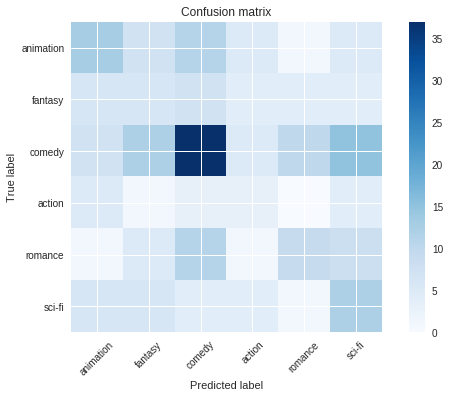

In [18]:
display_confusion_matrix(tf_vect, mlp, test_data)

# Exercise

**You are required to write two functions: **

*   **generate_models() : which generates each Word2Vec model for six genres ("tag" column) of the movie using "plot" data ([Remove stop words](https://radimrehurek.com/gensim/parsing/preprocessing.html#gensim.parsing.preprocessing.remove_stopwords)). 
  The generated models should be returned by the function.**
  
    Return: A dictionary (key: name of  genre, 'tag' & value: generated model) 
    
*   **get_vector(model_name, word) : which returns a vector of the given word in the given model (model_name - i.e. sci-fi). If the given word is not included in the vocabulary list, return None ** 
  
    Return : An array (vector of word embeddings)




In [0]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1x1BE_N8kCKDT9zo60DQPIjURy_-c5ULW'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('tagged_plots_movielens.csv')  

In [0]:
# You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# Please include the required libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset



In [52]:
CONTEXT_SIZE=2
data = pd.read_csv('tagged_plots_movielens.csv')
#remove mnissing values
data = data.dropna()
text=data['plots']
tag=data['tag']
my_tags = data.tag.unique()
my_tags[0]

'animation'

In [44]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#removing stop words and creating the bow
def preprocessing(tg):
  genren={}
  token=[]
  for i in range(len(tg)):
    val=data.loc[data['tag']==tg[i]]['plots']
    txt=''.join(val)
    txt=txt.split()
    for word in txt:
      if not word in stop_words:
        token.append(word)
    genren[tg[i]]=token
  return genren


In [132]:
gn=preprocessing(my_tags)
gn['action']

['A',
 'little',
 'boy',
 'named',
 'Andy',
 'loves',
 'room,',
 'playing',
 'toys,',
 'especially',
 'doll',
 'named',
 '"Woody".',
 'But,',
 'toys',
 'Andy',
 'them,',
 'come',
 'life.',
 'Woody',
 'believes',
 'life',
 '(as',
 'toy)',
 'good.',
 'However,',
 'must',
 'worry',
 "Andy's",
 'family',
 'moving,',
 'Woody',
 'know',
 "Andy's",
 'birthday',
 'party.',
 'Woody',
 'realize',
 "Andy's",
 'mother',
 'gave',
 'action',
 'figure',
 'known',
 'Buzz',
 'Lightyear,',
 'believe',
 'toy,',
 'quickly',
 'becomes',
 "Andy's",
 'new',
 'favorite',
 'toy.',
 'Woody,',
 'consumed',
 'jealousy,',
 'tries',
 'get',
 'rid',
 'Buzz.',
 'Then,',
 'Woody',
 'Buzz',
 'lost.',
 'They',
 'must',
 'find',
 'way',
 'get',
 'back',
 'Andy',
 'moves',
 'without',
 'them,',
 'pass',
 'ruthless',
 'toy',
 'killer,',
 'Sid',
 'Phillips.Capt.',
 'John',
 'Smith',
 'leads',
 'rag-tag',
 'band',
 'English',
 'sailors',
 '&',
 'soldiers',
 'New',
 'World',
 'plunder',
 'riches',
 'England',
 '(or,',
 'preci

In [0]:
from gensim.models import Word2Vec

In [0]:
def generate_models(inputs):
  models = {}

  for i in inputs.keys():
    text=inputs[i]
   
    model=Word2Vec([text],size=100, min_count=1,window=5,workers=4)
 
    models[i]=model   
  return models

In [151]:
models=generate_models(gn)
models

{'action': <gensim.models.word2vec.Word2Vec at 0x7efbe6dfc9e8>,
 'animation': <gensim.models.word2vec.Word2Vec at 0x7efbe8259828>,
 'comedy': <gensim.models.word2vec.Word2Vec at 0x7efbe745f208>,
 'fantasy': <gensim.models.word2vec.Word2Vec at 0x7efbe7b419e8>,
 'romance': <gensim.models.word2vec.Word2Vec at 0x7efbe671c208>,
 'sci-fi': <gensim.models.word2vec.Word2Vec at 0x7efbe60f5908>}

In [155]:
def get_vector(model, word):
  my_dict = {}
  for idx, key in enumerate(model.wv.vocab):
    my_dict[key] = model.wv[key]
  if word not in my_dict.keys():
    return None
  else:
    vector=model.wv[word]
  return "{}:{}".format(word,vector)
    
  




vector = get_vector(models["sci-fi"], "not_exist")

print(vector)

vector = get_vector(models["sci-fi"], "mars")

print(vector)

None
mars:[-1.8936853e-03 -5.6209968e-04  4.4639180e-03  7.9948275e-04
 -3.8380998e-03 -9.3739465e-05  1.1312597e-03  7.9211127e-04
 -4.3711402e-03 -9.6697238e-04 -9.6622651e-04  7.5237818e-05
 -3.1627915e-03 -4.5931637e-03 -2.4534333e-03  1.9422618e-03
 -2.6000689e-03 -2.8666761e-03  1.4361865e-03  4.3889065e-03
 -2.4019501e-03 -6.3335756e-05  4.6245377e-03  2.8220325e-04
  4.0751253e-03 -1.6120834e-03 -2.4705825e-03  4.0159896e-03
  2.3505616e-03  1.9939335e-03  4.0917839e-03  9.3203178e-04
  6.2286982e-04 -8.1599731e-04 -6.1756861e-04  4.1374154e-03
 -3.5204228e-03  8.8187480e-05 -7.5961294e-04 -2.3493213e-03
  4.0881401e-03  4.4044250e-04  1.7534333e-03 -4.5916851e-04
 -1.8112642e-03 -4.6540392e-03  3.6228802e-03  1.2041565e-04
  3.6465209e-03  4.9166013e-03 -1.8821512e-03  2.3634504e-03
 -2.1661054e-03  1.3633869e-03  4.9755429e-03 -3.7502241e-03
 -1.6001227e-03  1.0635448e-04  4.5009605e-03 -3.9558653e-03
  4.6843290e-03  4.5094849e-03  7.3236419e-04 -1.0007708e-03
 -3.2848702e-0